#**Polya Urns**

Project of *Numerical Methods with Python* for the QLS Diploma Program of the ICTP (2023-2024).

* Cristopher Erazo
* Mahgol Gholampour
* Joshua Lemus

**Outline**
* Definitions and Functions *
* Introduction
* Methodology
* Results
* Error Estimation

## **Definitions and Functions**

In [ ]:
#Importing the libraries

import numpy as np                  #Arrays and vectors
import math as math                 #Functions
import random as random             #Random numbers
import matplotlib.pyplot as plt     #Plots
import scipy.special as special     #Give special functions like Gamma, Di-gamma, etc.
from scipy.optimize import fsolve   #Solve system of non-linear equations

In [ ]:
def f(x,nb,nw):
  '''
  Probability Density Function for the limiting
  proportion of black balls in the box.

  Input
    -  x: real number between 0 and 1
    -  nb, nw: positive integers
  Output
    -  Return the prob. density at p=x given nb and nw.
  '''
  if (x.any() < 0. or x.any() > 1.):
    print('Error: x value out of range')
    return 0.
  #We calculate the normalization constant
  A = special.gamma(nb+nw)/(special.gamma(nb)*special.gamma(nw))
  return A*(x**(nb-1))*(1-x)**(nw-1)

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


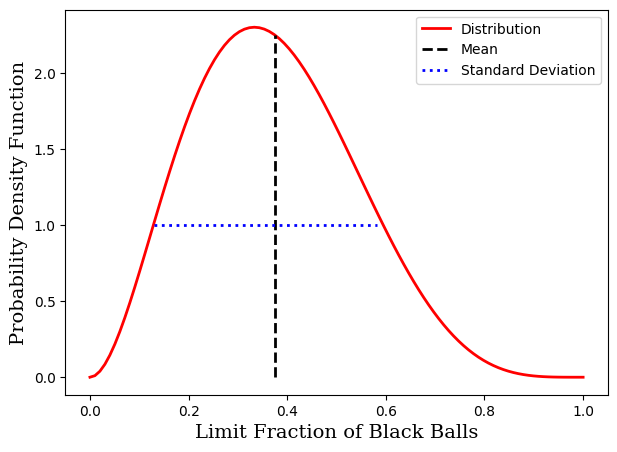

In [ ]:
N = 100
x = np.linspace(0,1,N)

#Here we can specify the dimensions of the image
plt.figure(figsize=(7,5),dpi=100)

nb = 3
nw = 5

#Real Mean
mu = nb / (nb+nw)
fmu = f(np.array([mu]),nb,nw)
#Second Moment
mu2 = mu * (nb+1)/(nb+nw+1)

#Standard Deviation
std = np.sqrt(mu2 - mu*mu)
a = 0.13
h = 1
y = f(x,nb,nw)
lab = "$n_b , n_w = $" + str(nb)+", "+str(nw)
plt.plot(x,y, label = "Distribution", lw = 2 , c = "r")
plt.plot([mu,mu],[0,fmu],lw = 2 ,linestyle = "dashed" , c="k",label="Mean")
plt.plot([a,a+2.8*std],[h,h],lw = 2 ,linestyle = "dotted" , c="blue",label="Standard Deviation")

plt.xlabel("Limit Fraction of Black Balls", fontdict = font)
plt.ylabel("Probability Density Function",fontdict = font)
plt.legend()
plt.show()

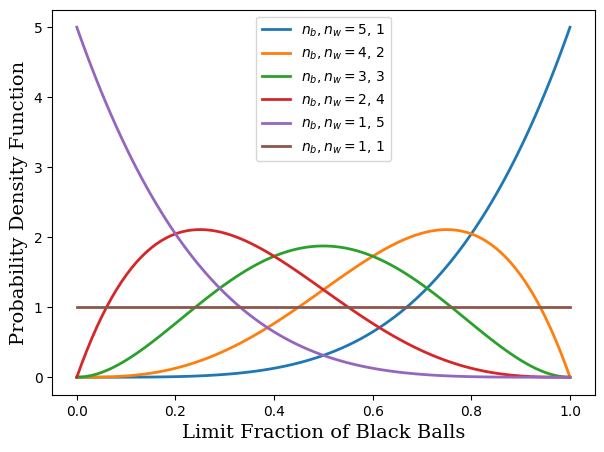

In [ ]:
#This is the dictionary for the font style

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

def plot_pdf(nb,nw):
  '''
  This function plots the pdf for different given values of nb and nw.
  nb and nw shoud be written as list or arrays, not single values.
  '''
  #We define the number of points and the domain for the plot
  N = 100
  x = np.linspace(0,1,N)

  #Here we can specify the dimensions of the image
  plt.figure(figsize=(7,5),dpi=100)

  #Now we make a loop for the different plots= 4.3 %
  for i in range(len(nw)):
    y = f(x,nb[i],nw[i])
    lab = "$n_b , n_w = $" + str(nb[i])+", "+str(nw[i])
    plt.plot(x,y, label = lab, lw = 2)

  plt.xlabel("Limit Fraction of Black Balls", fontdict = font)
  plt.ylabel("Probability Density Function",fontdict = font)
  plt.legend()
  plt.show()

plot_pdf([5,4,3,2,1,1],[1,2,3,4,5,1])

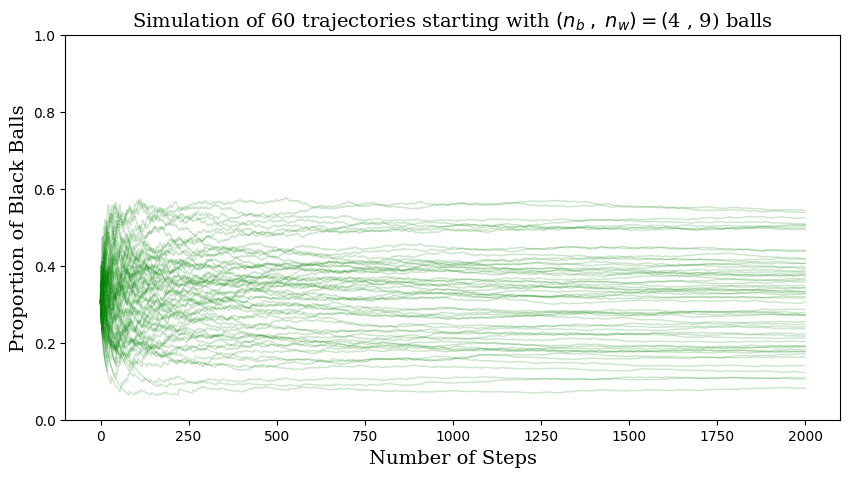

In [ ]:
def trajectory(N_sim,nb,nw):
  '''
  This function simulates the evolution of the Polya Urn during N_sim steps
  for a box with nb and nw black and white initial balls respectively.

  This function returns the proportion of black balls at each step of the simulation
  as an array, and the average of the last 100 values as an estimation of the
  limit probability. It also presents an estimation of the error as the standard
  deviation of the last 100 values

  '''
  #We create variables to save the number of black and white balls at step t
  #And we initialize them with the input values
  Nb = nb
  Nw = nw

  #With this values we calculate the initial proportion and save it in an array.
  pn = Nb/(Nb + Nw)
  P = [pn]

  for t in range(N_sim):

    #We draw a uniform random number in (0,1) and we compare with the current proportion.
    r = random.random()

    if r <= pn: #Here is the case in which we choose a black ball
      Nb = Nb + 1

    else:       #Here we choose a white ball
      Nw = Nw + 1

    #We calculate the new proportion and save it in a list.
    pn = Nb/(Nb+Nw)
    P.append(pn)

  #After we finish, we convert the list to an array and calculate the average of
  #the last values of the array to have a better aproximation for the limit proportion.
  P = np.array(P)
  N_last = 100  #Here we choose the last 100 values, but this can be changed.
  P_lim = np.average(P[-N_last:-1])

  #The error is estimated as the standard deviation of the last 100 values.
  Err = np.std(P[-N_last:-1])

  return P,P_lim,Err


def multiple_trajectories(N_samples,N_sim,nb,nw,image = True,w = 1, a = 1):
  '''
  This function performs N_samples trajectories with the Polya Urn
  methodology starting always with nb and nw black and white balls.

  Each trajectory has N_sim steps and the limiting probability is
  computed with the last steps of each trajectory.

  The function returns the array of limit probabilities for each of the
  N_samples trials that we can use to compute a histogram and compare with
  the beta pdf.

  If image = True, the function also plots the set of trajectories in a
  single figure.

  a is the opacity of the trajectories and w the line width
  '''
  Lim_P = []
  #Here we can specify the dimensions of the image


  if (image == True):
    plt.figure(figsize=(10,5),dpi=100)
    for i in range(N_samples):
      P, aux1, aux2 = trajectory(N_sim,nb,nw)
      Lim_P.append(aux1)
      plt.plot(P,c = "green",alpha = a,lw = w)
    plt.xlabel("Number of Steps",fontdict=font)
    plt.ylabel("Proportion of Black Balls",fontdict=font)
    plt.title("Simulation of "+str(N_samples)+" trajectories starting with $(n_b \; , \; n_w) = ($" + str(nb)+" , "+str(nw)+") balls",fontdict=font)
    plt.ylim(0,1)
    plt.show()
  else:
    for i in range(N_samples):
      P, aux1, aux2 = trajectory(N_sim,nb,nw)
      Lim_P.append(aux1)

  return Lim_P

lim = multiple_trajectories(60,2000,4,9,a=0.2,image=True)

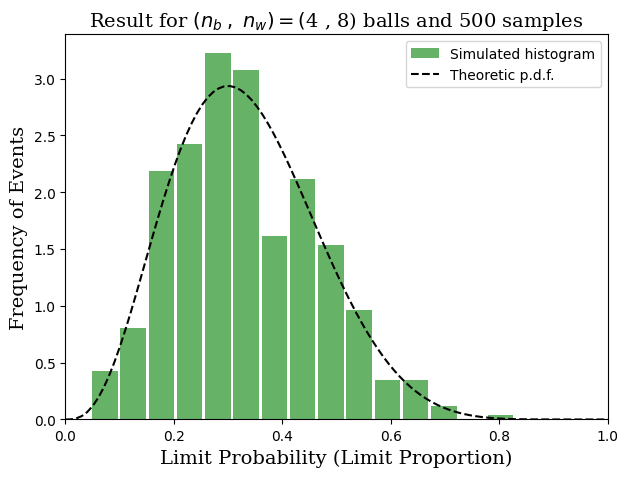

In [ ]:
def prob_hist(N_samples,N_sim,nb,nw,N_bins):
  '''
  This function calculates and plots the histogram of the limiting distribution
  for p based on N_samples trajectories, each of wich contains N_sim steps
  and all of them start with the same number of nb and nw balls.
  N_bins is the number of bins for the histogram.
  '''

  #First we define the domain and compute the theoretical distribution.
  x = np.linspace(0,1,100)
  y = f(x,nb,nw)

  #Here we call the function to evaluate multiple trajectories
  #and to obtain the limit proportions of black balls for each one.
  Lim_P = multiple_trajectories(N_samples,N_sim,nb,nw,image=False)

  plt.figure(figsize=(7,5),dpi=100)

  #We plot the histogram depending on the number of bins defined.
  plt.hist(Lim_P , bins = N_bins , density = True , color = "green", alpha = 0.6, rwidth = 0.9 , label= "Simulated histogram")

  #We plot the theoretical curve above the histogram.
  plt.plot(x,y,c="black",linestyle = "dashed",lw = 1.5 , label="Theoretic p.d.f.")
  plt.xlabel("Limit Probability (Limit Proportion)",fontdict = font)
  plt.ylabel("Frequency of Events", fontdict = font )
  plt.title("Result for $(n_b \; , \; n_w) = (${0:1d} , {1:1d}) balls and {2:1d} samples".format(nb,nw,N_samples),fontdict = font)
  plt.xlim(0,1)
  plt.legend()
  plt.show()

prob_hist(500,3000,4,8,15)

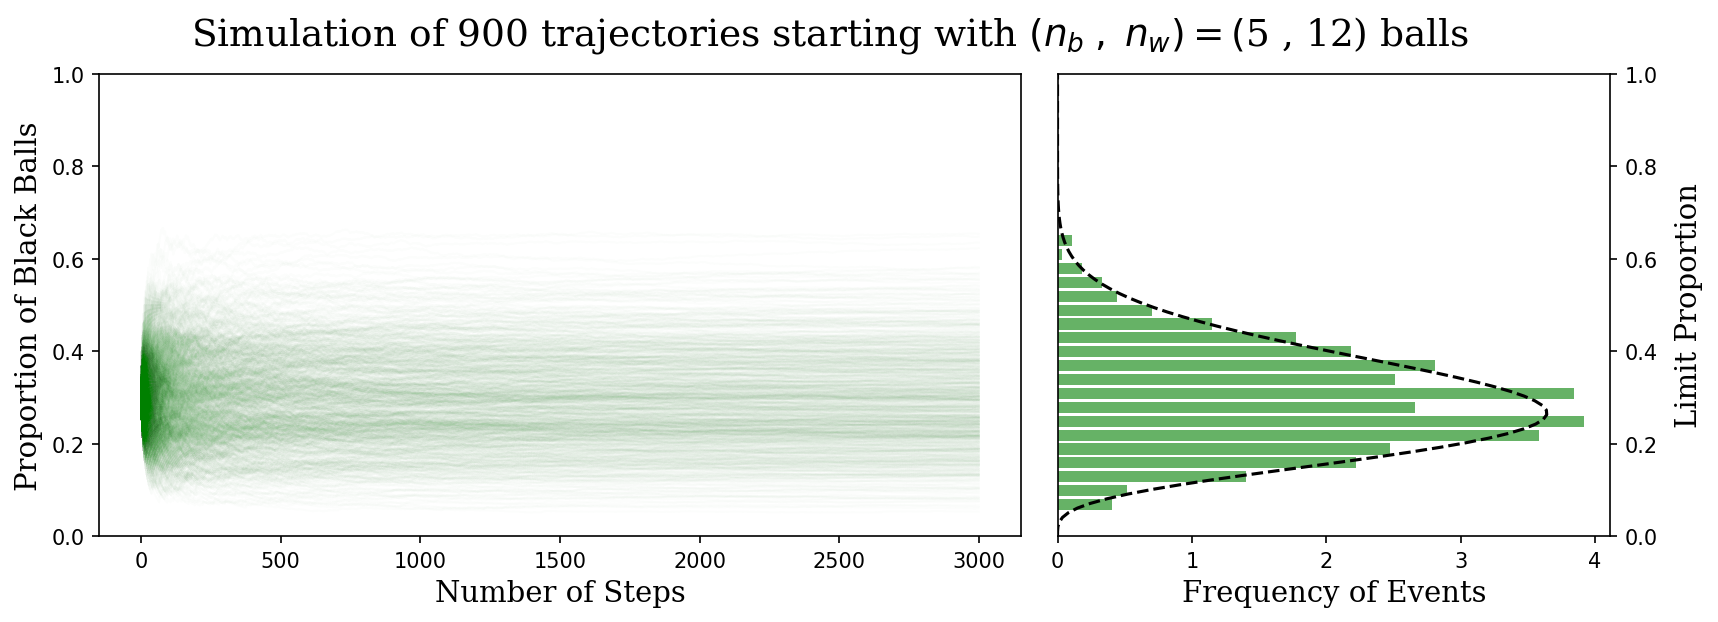

In [ ]:
def hist_and_traj(N_samples,N_sim,nb,nw,N_bins,w = 1, a = 1):
  '''
  This function plots the N_samples trajectories along with the histogram to a
  better visualization.
  '''

  #We define the figure for the two plots
  fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4),dpi = 150,width_ratios=[5, 3])

  #We adjust the horizontal space between the plots
  fig.subplots_adjust(wspace = 0.05)

  #General title
  fig.suptitle( "Simulation of "+str(N_samples)+" trajectories starting with $(n_b \; , \; n_w) = ($" + str(nb)+" , "+str(nw)+") balls",fontdict=font , size=18)

  #Array to collect the limiting probabilities
  Lim_P = []

  #FIRST PLOT (LEFT)
  #We perform N_samples trajectories and plot each of them saving Lim_P
  for i in range(N_samples):
    P, aux1, aux2 = trajectory(N_sim,nb,nw)
    Lim_P.append(aux1)
    ax0.plot(P,c = "green",alpha = a,lw = w)
  ax0.set_xlabel("Number of Steps",fontdict=font)
  ax0.set_ylabel("Proportion of Black Balls",fontdict=font)
  ax0.set_ylim(0,1)

  #SECOND PLOT (RIGHT)
  #Now, we define the domain for the pdf an compute it
  x = np.linspace(0,1,100)
  y = f(x,nb,nw)

  #We plot the histogram depending on the number of bins defined.
  ax1.hist(Lim_P , bins = N_bins , density = True , color = "green", alpha = 0.6, rwidth = 0.8 , label= "Simulated histogram",orientation=u'horizontal')

  #We plot the theoretical function
  ax1.plot(y,x,c="black",linestyle = "dashed",lw = 1.5 , label="Theoretic p.d.f.")

  #We change the ticks of the second plot to the right
  ax1.yaxis.tick_right()
  ax1.set_xlabel("Frequency of Events",fontdict = font)
  ax1.set_ylabel("Limit Proportion", fontdict = font,labelpad=-310)
  ax1.set_ylim(0,1)

  #fig.tight_layout( )


hist_and_traj(900,3000,5,12,20,a=0.01)

In [ ]:
def measures_comparison(N_sim,N_SAMPLES,N_rep,nb,nw):
  '''
  This function creates a plot of the error obtained comparing the mean and the
  standard deviation of the data with the real values for different number of samples
  N_SAMPLES is an array with all the values for the sample points.
  '''

  #Real Mean
  mu = nb / (nb+nw)

  #Second Moment
  mu2 = mu * (nb+1)/(nb+nw+1)

  #Standard Deviation
  std = np.sqrt(mu2 - mu*mu)

  #Now we are going to compute the mean and std for the data with
  #the diferent number of sample points

  Nit = len(N_SAMPLES)

  Av_Error1 = []
  Std_Error1 = []
  Av_Error2 = []
  Std_Error2 = []

  for i in range(Nit):
    print(i)
    E1 = []
    E2 = []
    N_samples = int(N_SAMPLES[i])
    for j in range(N_rep):
      X = multiple_trajectories(N_samples,N_sim,nb,nw,image = False)
      aux1 = np.mean(np.array(X))
      aux2 = np.std(np.array(X))



      E1.append(aux1)
      E2.append(aux2)

    E1 = np.array(E1)
    E2 = np.array(E2)

    E1 = 100*np.absolute(E1 - mu)/mu
    E2 = 100*np.absolute(E2 - std)/std
    av1 = np.average(E1)
    st1 = np.std(E1)

    av2 = np.average(E2)
    st2 = np.std(E2)


    Av_Error1.append(av1)
    Std_Error1.append(st1)

    Av_Error2.append(av2)
    Std_Error2.append(0.6*st2)


  plt.figure(figsize=(7,5),dpi=200)
  plt.errorbar(N_SAMPLES,Av_Error1,Std_Error1,marker = 's',capsize = 5, ecolor = "gray",color="black" , label="Average Error")
  plt.errorbar(N_SAMPLES,Av_Error2,Std_Error2,marker = 'o',capsize = 5, ecolor = "skyblue",color="blue", label="Standard Deviation Error")
  plt.plot(N_SAMPLES,np.zeros(Nit),linestyle="dashed",c="k",lw=0.5,alpha=0.5)
  plt.xlabel('Number of Sample Point' , fontdict = font)
  plt.ylabel('Error Percentage %',fontdict = font)
  plt.title('The real values are $(n_b \; , \; n_w) = ($' + str(nb)+' , '+str(nw)+').' ,fontdict = font)
  plt.xscale("log")
  plt.yscale('log')


  plt.legend()
  plt.show()


[   10.            23.71373706    56.23413252   133.35214322
   316.22776602   749.89420933  1778.27941004  4216.96503429
 10000.        ]
0
1
2
3
4
5
6
7
8


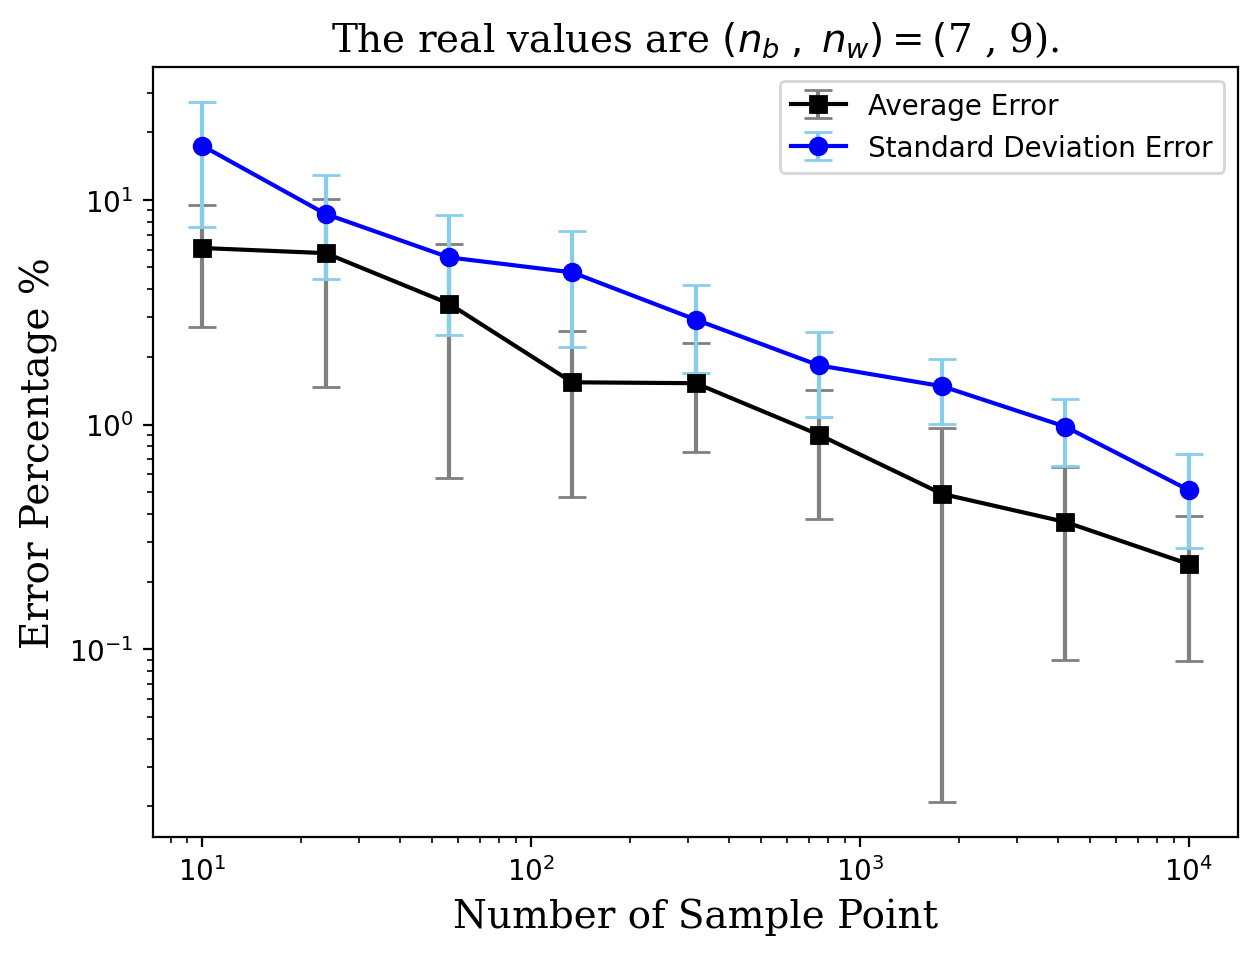

In [ ]:
#[100,300,500,700,900,1000,1200,1400,1600,1800,2000]
N_SAMPLES = np.logspace(1,4,num = 9)
print(N_SAMPLES)
measures_comparison(1700,N_SAMPLES,25,7,9)

In [ ]:
def log_lihelihood (nb,nw,S1,S2):
  '''
  This function calculates the normalized log likelihood function for
  the set of sample points x as a function of the parameters nb , nw
  '''

  #F = (1/N) log(likelihood)
  F = np.log(special.gamma(nb+nw)/(special.gamma(nb)*special.gamma(nw))) - S1*(nb-1) - S2*(nw-1)
  return F

def plot_likelihood (N_samples,N_sim,r_nb,r_nw,nb,nw):
  '''
  This function plots the likelihood function to observe its behaviour
  '''
  #With the number of sample points (N_samples) we can compute the constants S1 and S2
  #we need to define the set of equations

  Np = 250
  x = np.linspace(r_nb[0],r_nb[1],Np)
  y = np.linspace(r_nw[0],r_nw[1],Np)
  X,Y = np.meshgrid(x, y)


  sample_points = multiple_trajectories(N_samples,N_sim,nb,nw,image = False)
  S1 = -np.sum(np.log(sample_points)) / N_samples
  S2 = -np.sum(np.log(np.ones(N_samples)-sample_points)) / N_samples


  Z = np.exp(log_lihelihood (X,Y,S1,S2))

  fig, ax = plt.subplots(figsize = (8,8), dpi=100 )
  im = ax.pcolormesh(x, y, Z)
  fig.colorbar(im)
  ax.plot([nb],[nw],marker = '*' ,c = 'red' ,markersize = 9)
  ax.set_xlabel('Number of black balls $n_b$' ,fontdict = font)
  ax.set_ylabel('Number of white balls $n_w$' ,fontdict = font)
  ax.set_title('Likelihood function for '+str(N_samples)+ ' points. \n The real values are $(n_b \; , \; n_w) = ($' + str(nb)+' , '+str(nw)+').' ,fontdict = font)

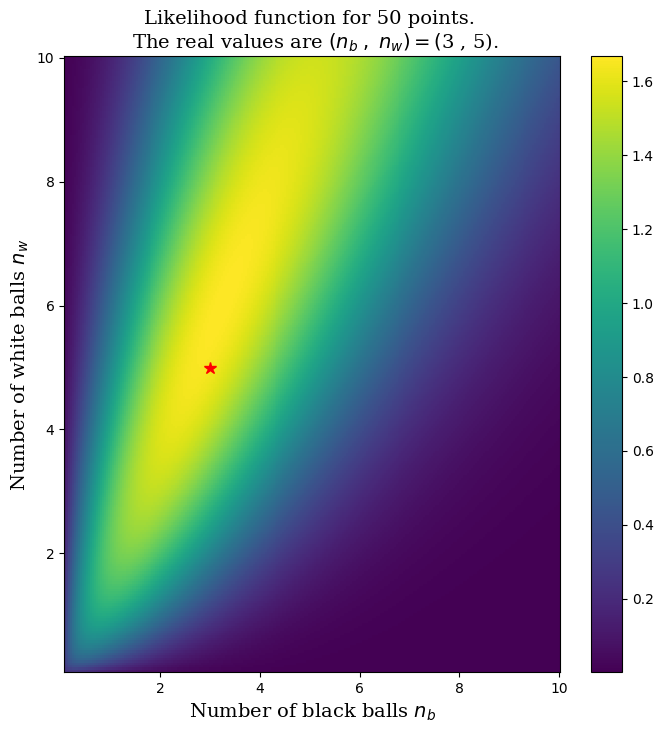

In [ ]:
plot_likelihood (50,1000,[0.1,10],[0.1,10],3,5)

In [ ]:
def equation(P,S1,S2):
  '''
  This function defines the set of equations we need to solve in order to maximize
  the likelihood function and find the optimal parameters: nb, nw.
  The values S1 and S2 are constants computed from the sample points.
  '''
  nb = P[0]
  nw = P[1]
  eq1 = special.digamma(nb + nw) - special.digamma(nb) - S1
  eq2 = special.digamma(nb + nw) - special.digamma(nw) - S2
  return [eq1 , eq2]

def ML_Estimation(x,nb,nw,text = True):
  '''
  This function receives a set of sample points x (assumed to be drawn from the distribution F(x,nb,nw))
  and compute the optimal parameters nb_opt and nw_opt for the distribution with the Maximum Likelihood
  Estimation method.
  nb and nw are the true values of the distribution and if text = True, the function also prints
  the results of the computation.

  The function returns the optimal values nb_opt and nw_opt, and the average error compared with nb and nw.
  '''

  #With the number of sample points (N) we can compute the constants S1 and S2
  #we need to define the set of equations
  N = len(x)
  S1 = -np.sum(np.log(x)) / N
  S2 = -np.sum(np.log(np.ones(N)-x)) / N

  #We are using scipy.optimize.fsolve() to solve the system of eq.
  #We start with the value (nb_0 , nw_0) = (1 , 1) because that is the uniform distribution.
  nb_opt , nw_opt = fsolve(equation, [1, 1] ,args=(S1,S2))

  #Once we get the parameters we compare to the true values to obtain the average error.
  #NOTE that the true values are only used for comparison after computing the parameters with MLE.
  Eb = 100*np.abs(nb-nb_opt)/nb_opt
  Ew = 100*np.abs(nw-nw_opt)/nw_opt
  Eav = 0.5*(Eb+Ew)

  #Display the results
  if(text == True):
    print('Number of sample points = {0:1n}'.format(N))
    print('True Values')
    print('n_b = {0:1n}'.format(nb))
    print('n_w = {0:1n}'.format(nw))
    print('Computed Values')
    print('n_b ~ {0:1.2f} with an error of {1:1.1f} %'.format(nb_opt,Eb))
    print('n_w ~ {0:1.2f} with an error of {1:1.1f} %'.format(nw_opt,Ew))
    print('Average Error')
    print('Error = {0:1.1f} %'.format(Eav))

  return nb_opt,nw_opt,Eav

In [ ]:
def Error_Plot (N_sim,N_SAMPLES,N_rep,nb,nw):
  '''
  This function creates a plot of the error obtained in the estimation of parameters
  as a function of the number of sample points N_samples.

  Here N_SAMPLES is an array with the different number of sample points in which
  we want to evaluate the error. If the values are not integer, the function
  calculate automatically its integer part.
  '''

  Nit = len(N_SAMPLES)

  Av_Error = []
  Std_Error = []
  for i in range(Nit):
    print(i)
    E = []
    N_samples = int(N_SAMPLES[i])
    for j in range(N_rep):
      X = multiple_trajectories(N_samples,N_sim,nb,nw,image = False)
      #print(X)
      aux1, aux2, aux3 = ML_Estimation(X,nb,nw,text = False)
      E.append(aux3)

    av = np.average(np.array(E))
    st = np.std(np.array(E))
    Av_Error.append(av)
    Std_Error.append(0.7*st)

  plt.figure(figsize=(7,5),dpi=200)
  plt.errorbar(N_SAMPLES,Av_Error,Std_Error,marker = 's',capsize = 5, ecolor = "red",color="black")
  plt.xlabel('Number of Sample Points' , fontdict = font)
  plt.ylabel('Error Percentage',fontdict = font)
  plt.xscale('log')
  plt.yscale('log')

  plt.show()

  return Av_Error,Std_Error



##**Introduction**

The Polya Urn is a thought experiment which is based on  consecutive draws of balls from a box. At the begining we start with $n_b$ and $n_w$ black and white balls respectivelly and after each random extraction the color of the ball is noted an then put back including an *additional ball of the same color*. This means that the number of balls in the box is constantly increasing, and the proportion of *black* balls changes with each iteration.

Let $k_t$ be the number of black balls drawn after $t$ extractions, therefore, in the step $t$:

$N_b(t) = n_b + k_t$ is the number of black balls in the box, and

$N_w(t) = n_w + t - k_t$ is the number of white balls.

Being in this configuration, we can ask what is the probability that we get a black ball in the next draw, and this is just computed using the proportion of balls.

\begin{equation}
p_{t+1} \equiv P\{k_{t+1} = k_{t}+1 | k_t = k\} = \dfrac{N_b(t)}{N_b(t)+N_w(t)} = \dfrac{n_b + k}{n_b + n_w + t}
\end{equation}

**- Note that** *we have written $p_{t+1}$ as a conditional probability because it depends on the proportion of black balls, and since it only depends on the current proportion (does not matter how we reached that state) it is also a **Markov Process** by construction.*

Now we are interested in the limiting behavior of this proportion as $t → ∞$

\begin{equation}
p \equiv \lim_{t → ∞} p_t
\end{equation}

but, since $k_t$ is a random variable, this limit probability is also a random variable, and its probability distribution function is given by the *beta function*:

\begin{equation}
f(x \;|\; n_b,n_w) \;dx = P\{\;p \in (x,x+dx)\;|\; n_b,n_w\} = \dfrac{\Gamma(n_b+n_w)}{\Gamma(n_b)\; \Gamma(n_w) } x^{n_b - 1} (1-x)^{n_w-1} dx
\end{equation}

The objetive of this project is to test computationally this result simulating the Polya Urn process and analizing its limiting behaviour.

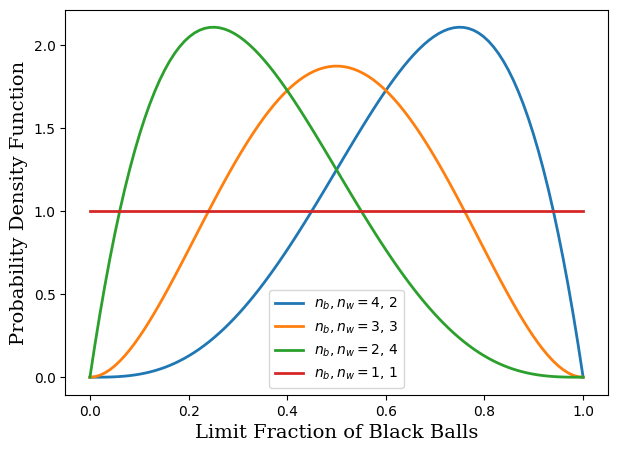

In [ ]:
nb = [4,3,2,1]
nw = [2,3,4,1]
plot_pdf(nb,nw)

## **Methodology**

To simulate the Polya Urn system we start with $n_b$ and $n_w$ black and white balls respectively, and we perform the following steps:

* Let $N_b$ and $N_w$ be the number of balls of each color at certain step.
* $p_n = \dfrac{N_b}{N_b+N_w}$ is the probability of drawing a black ball.
* We draw a random number ($R$) uniformily distributed between $0$ and $1$.
  - If $R \le p_n$ we have selected a black ball and $N_b = N_b +1$.
  - If $R > p_n$ $N_w = N_w +1$
* Then we save the new proportion $p_n$ and repeat the procedure a given number of iterations.
* With the final values for the proportion we estimate the limit probability.

After this procedure we have one limit value for the probability, to construct the histogram we need to repeat the algorithm several times.

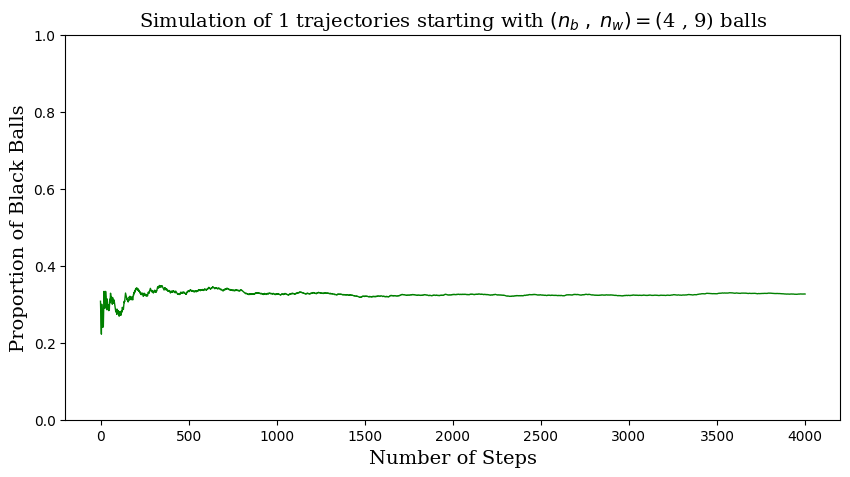

In [ ]:
#This is the main function that performs the algorithm explained above
multiple_trajectories?

N_samples = 1   #Number of trajectories to be computes
N_sim = 4000    #Number of steps in each trajectorie
nb = 4          #Initial number of black balls
nw = 9          #Initial number of white balls

lim = multiple_trajectories(N_samples, N_sim, nb, nw)

When we run the simulation we observe that the proportion of black balls is aproaching certain limit value as the number of steps increase.

## **Results**

The function  ``` multiple_trajectories(N_samples, N_sim, nb, nw) ``` performs the Polya Urn algorithm for ```N_samples``` trajectories.

In the example above we selected ```N_samples = 1```, but if we increase the number of samples we get the following result:



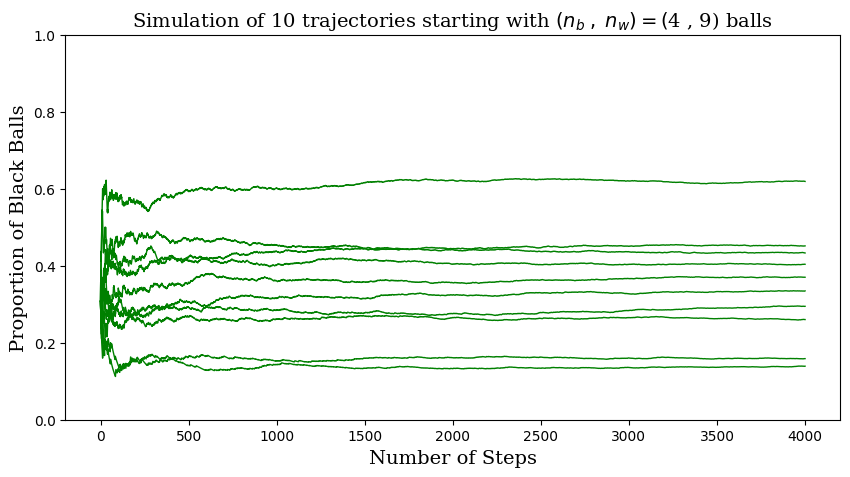

In [ ]:
N_samples = 10
lim = multiple_trajectories(N_samples, N_sim, nb, nw)

This show us that the limit value is not the same one for all trajectories *(unless we fix the initial seed for the random number generator function)*. This confirms partially the premise that there is a distribution for the limiting values.

If we increase even more the number of samples we get the following behaviour:

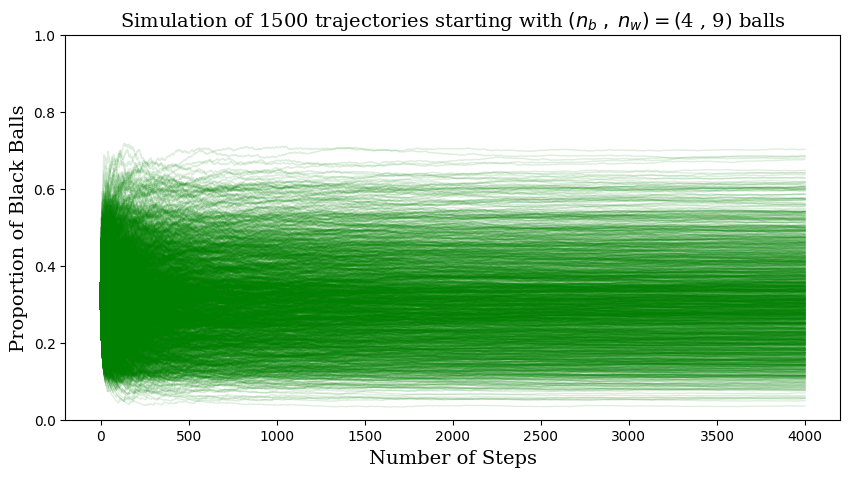

In [ ]:
N_samples = 1500
lim = multiple_trajectories(N_samples, N_sim, nb, nw ,a=0.13)
#a controls the opacity of each trajectory

Here we can see that each trajectory converge to some particular value, but they are more concentrated around the value $p = 0.3$ rather than in the extremes of the interval.

We can also change the initial number of balls and see that the behaviour changes:

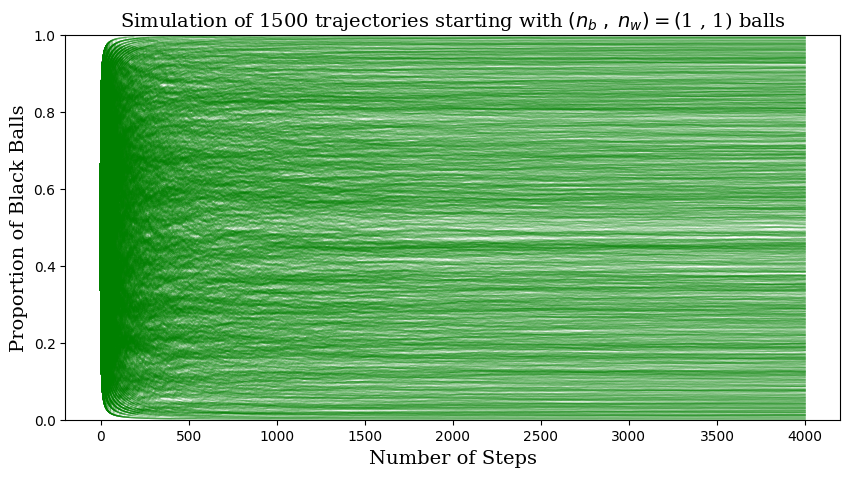

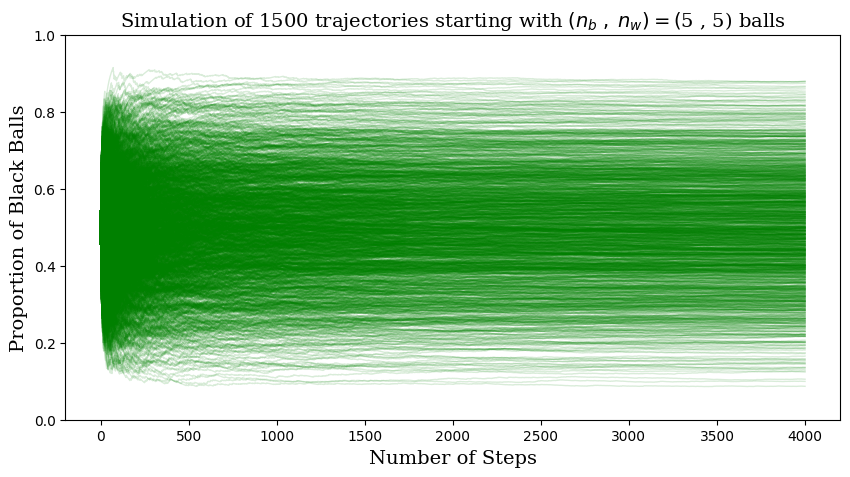

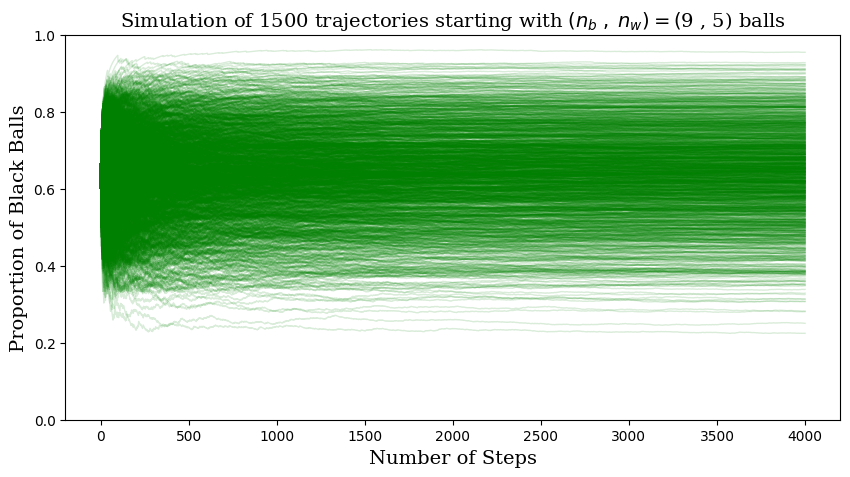

In [ ]:
nb = 1
nw = 1
lim = multiple_trajectories(N_samples, N_sim, nb, nw ,a=0.15)

nb = 5
nw = 5
lim = multiple_trajectories(N_samples, N_sim, nb, nw ,a=0.15)

nb = 9
nw = 5
lim = multiple_trajectories(N_samples, N_sim, nb, nw ,a=0.15)

This feature shows that the distribution of limit proportions is dependent on the initial parameters $n_b$ and $n_w$.

Now we can plot the same trajectories, but along with an histogram for the simulated values.



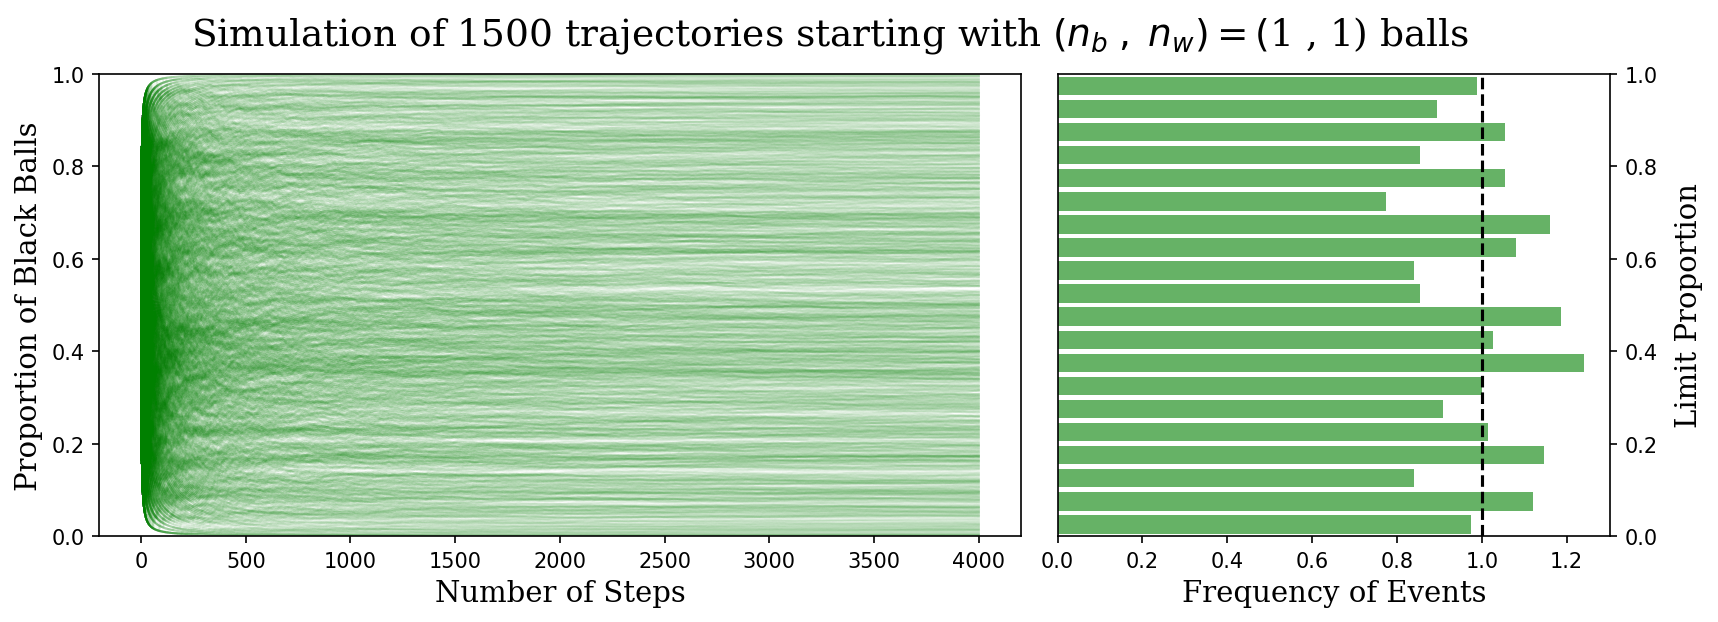

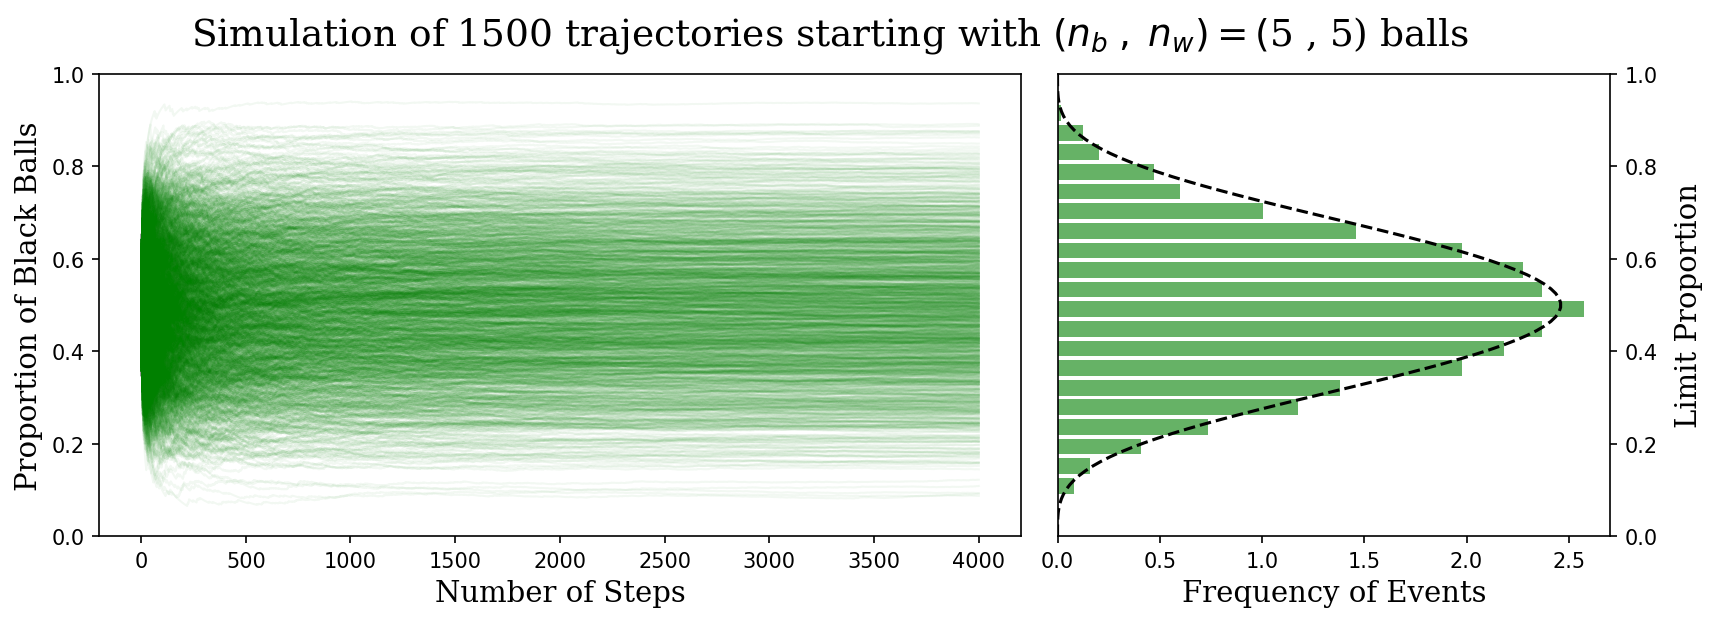

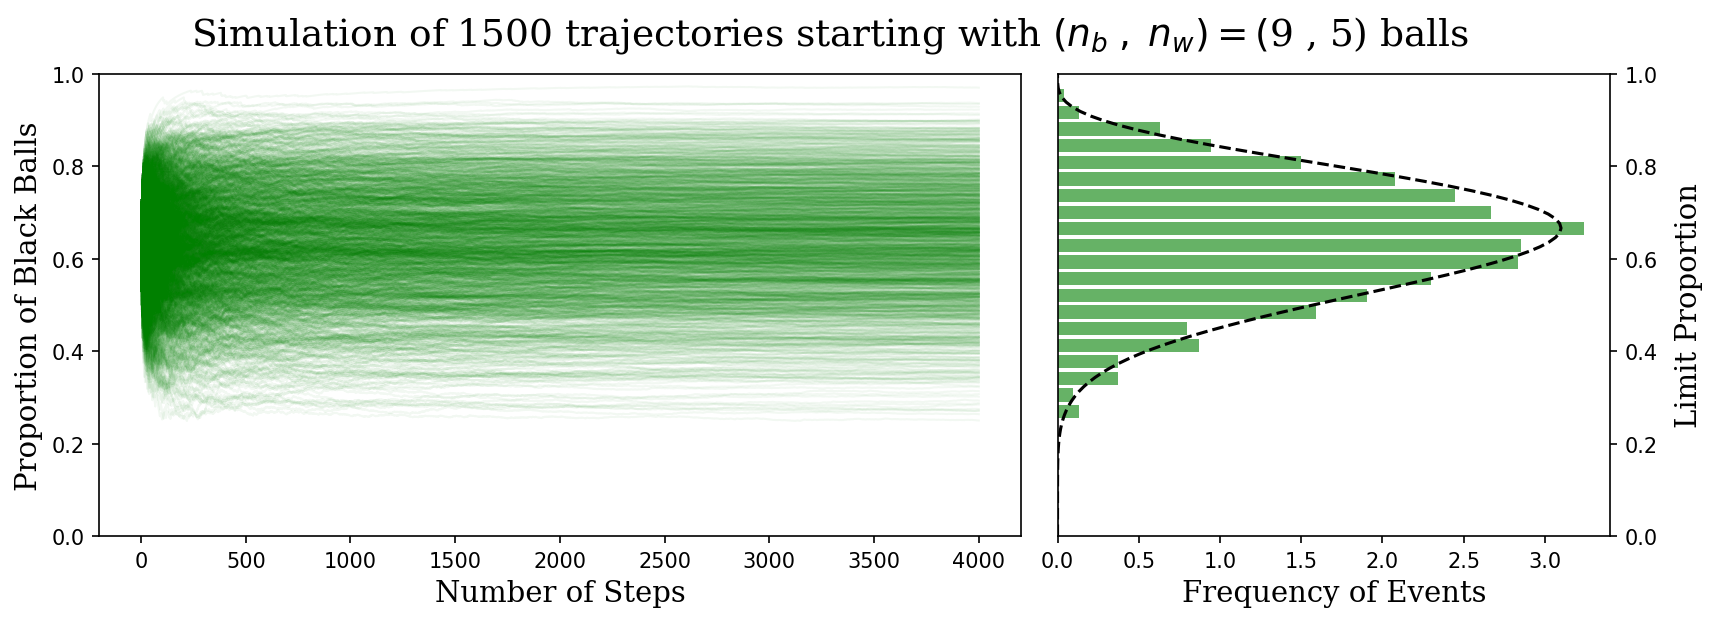

In [ ]:
n_bins = 20

nb = 1
nw = 1
hist_and_traj(N_samples,N_sim,nb,nw,n_bins,a=0.05)

nb = 5
nw = 5
hist_and_traj(N_samples,N_sim,nb,nw,n_bins,a=0.05)

nb = 9
nw = 5
hist_and_traj(N_samples,N_sim,nb,nw,n_bins,a=0.05)

## **Error Estimation**

So far we have checked qualitative that the Polya Urn process produces random numbers that follow certain distribution, and this distribution seems to converge to the Beta Distribution, but we have not checked quantitatively this fact.

To do so we can procede in different ways:
* We can start comparing relevant measures of the data (mean, standard deviation) with the theoretical values for the Beta Function.
* We can fit the simulated distribution to a Beta Function and compare the parameters $\hat{n_b}$ and $\hat{n_w}$ with the real values.  

### Beta Function Measures

We can compute the $k-th$ moment of the beta function $f(x|n_b,n_w)$ analitically following the definition:

\begin{equation}
\mu_k ≡ \mathbb{E} [x^k] = \dfrac{\Gamma(n_b+n_w)}{\Gamma(n_w) \Gamma(n_b)} \displaystyle \int _0 ^1 x^k x^{n_b-1}(1-x)^{n_w-1} = \dfrac{\Gamma(n_b + n_w) \; \Gamma(n_b + k)}{\Gamma(n_b + n_w + k) \; \Gamma(n_b)}
\end{equation}

From this we can conclude that:
\begin{equation}
\mathbb{E} [x] = \mu = \dfrac{n_b}{n_w + n_b} \\
\mathbb{E} [x²] = \mu_2 = \dfrac{n_b}{n_w + n_b} \dfrac{n_b + 1}{n_b + n_w + 1}\\
\mathbb{Std}[x] = \sqrt{\mathbb{E} [x^2] - \mathbb{E} [x]^2} = \mu \sqrt{\dfrac{(n_b + 1)(n_b + n_w)}{(n_b)(n_b + n_w + 1)} - 1}\\
\vdots
\end{equation}

and also we have the general recurence relationship:

\begin{equation}
\mu_{k+1} = \mu_k \left ( \dfrac{n_b + k}{n_b + n_w + k} \right)
\end{equation}

In this way we can compute the real mean and standard deviation of the distribution and compare it with the values obtained with the sample points.

0
1
2
3
4
5
6
7
8
9


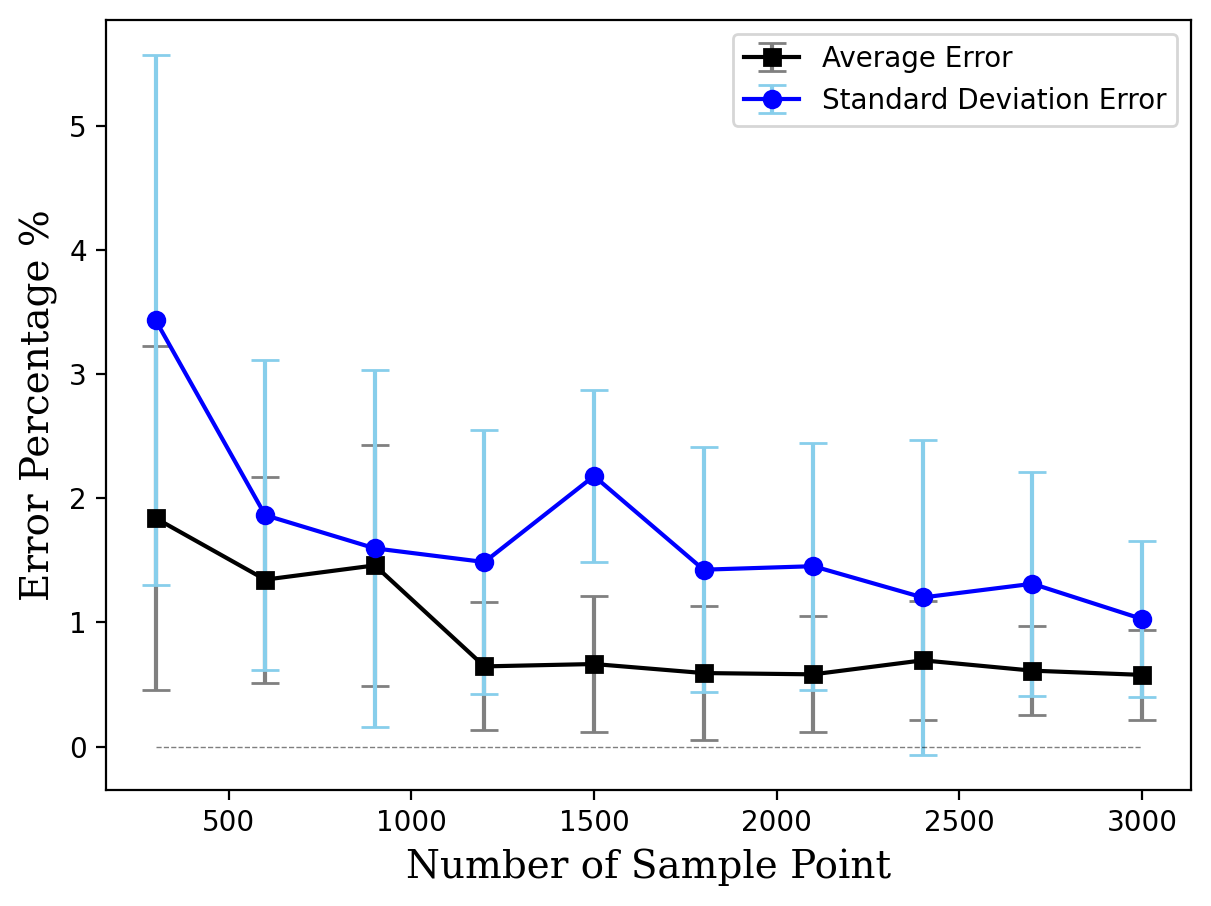

In [ ]:
N_SAMPLES = [300,600,900,1200,1500,1800,2100,2400,2700,3000]
N_sim = 1700
N_rep = 20
nb = 4
nw = 8
measures_comparison(N_sim,N_SAMPLES,N_rep,nb,nw)

### Maximum Likelihood Estimation

We need to check quantitatively if the samples we are getting are drawn from the probability distribution.

$f(x | n_w,n_b) = \dfrac{\Gamma(n_b+n_w)}{\Gamma(n_w) \Gamma(n_b)} x^{n_b-1}(1-x)^{n_w-1}$

To check that, we are ussing *Maximum Likelihood Estimation MLE*:

From an experiment we find several samples $x_1, x_2, \cdots, x_N$ that we assume, came from the distribution $f$. To confirm that, we build the **Likelihood** function:

$\mathscr{L}(n_b,n_w) = f(x_1, x_2, \cdots, x_N | n_b,n_w) =\displaystyle\prod_{i=1}^N f(x_i|n_b,n_w)$

which is the joint probability distribution to observe all the data points given the parameters. The objective of the MLE methos is to maximize this function in order to get the parameters $\hat{n_b}$ and $\hat{n_w}$ of the distribution that best fit the data we observed.

To make it is easier, we compute $\log \mathscr{L}(n_b,n_w)$:

 $\log \mathscr{L}(n_b,n_w)=\displaystyle\sum_{i=1}^n \log f(x_i|n_b,n_w) = N \log \left(\dfrac{\Gamma(n_b+n_w)}{\Gamma(n_b) \Gamma(n_w) } \right) - N (n_b-1) S_1 - N (n_w-1)S_{2}$

Where

\begin{equation}
S_1 = -\dfrac{1}{N}\displaystyle\sum_{i=1}^n \log x_i \qquad and \qquad S_{2} = - \dfrac{1}{N}\displaystyle\sum_{i=1}^n \log (1-x_i)
\end{equation}

And we can define a new function to simplify the set of equation:

\begin{equation}
F(n_b,n_w) \equiv \dfrac{1}{N} \; \log \mathscr{L}(n_b,n_w) =  \log \left(\dfrac{\Gamma(n_b+n_w)}{\Gamma(n_b) \Gamma(n_w) } \right) -  (n_b-1) S_1 -  (n_w-1)S_2
\end{equation}


Now we can see how this likelihood behaves as a function of $(n_b,n_w)$:


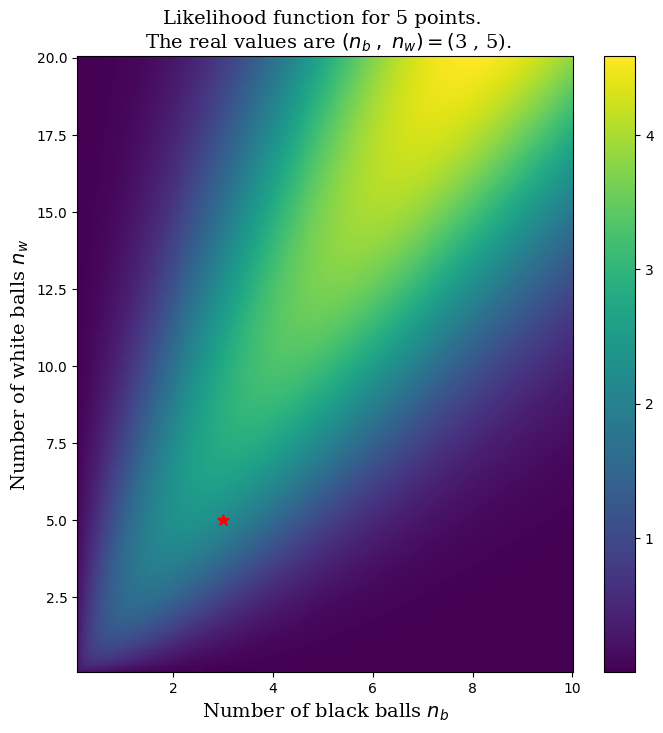

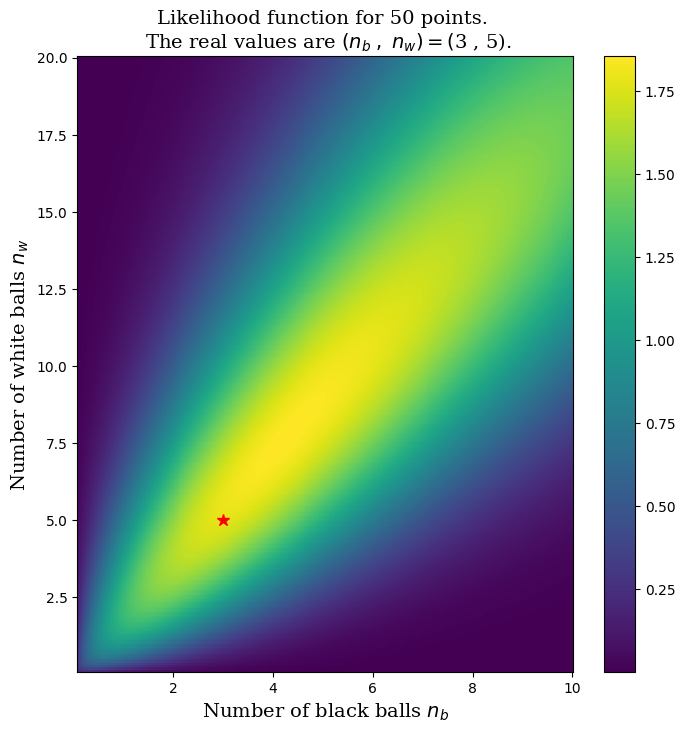

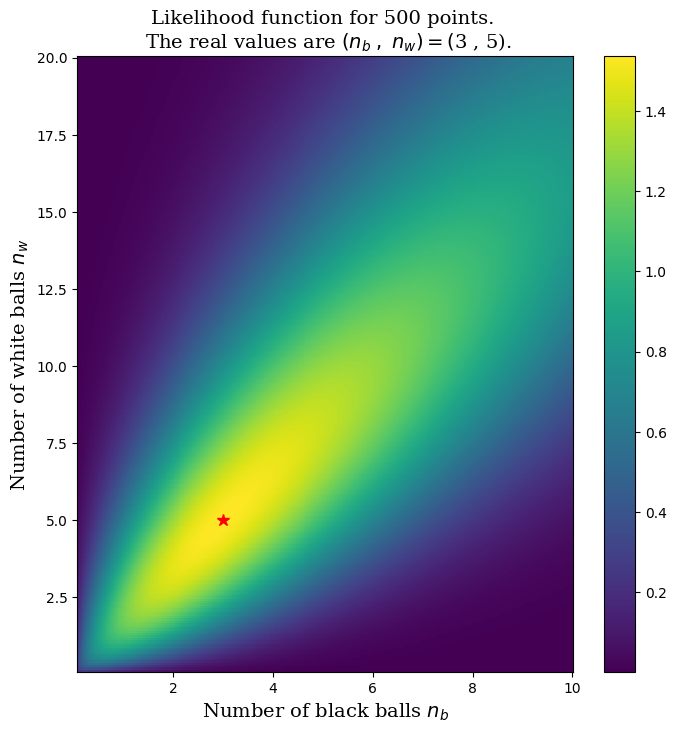

In [ ]:
Range_nb = [0.1,10]
Range_nw = [0.1,20]
N_sim = 2000
N_samples = 5
plot_likelihood (N_samples,N_sim,Range_nb,Range_nw,nb,nw)

N_samples = 50
plot_likelihood (N_samples,N_sim,Range_nb,Range_nw,nb,nw)

N_samples = 500
plot_likelihood (N_samples,N_sim,Range_nb,Range_nw,nb,nw)

N_samples = 5000
#plot_likelihood (N_samples,N_sim,Range_nb,Range_nw,nb,nw)

We can see that when the number of sample points increase, the maximum of the funtion tends to the red dot which are the real values of the parameters.

If we maximize the function $F$, we are also maximizing the likelihood $\mathscr{L}$ and therefore finding the optimal parameters $\hat{n_b}, \; \hat{n_w}$



Now we can take the derivatives and write a set of non-linear equations for $\hat{n_b}$ and $\hat{n_w}$.

$\dfrac{\partial F}{\partial n_b} = \Phi(n_b + n_w) - \Phi(n_b) - S_1 = 0$

$\dfrac{\partial F}{\partial n_w} = \Phi(n_b + n_w) - \Phi(n_w) - S_2= 0$

Where $\Phi(z) = \dfrac{d  \log \Gamma (z)}{dz}$ is the di-gamma function.

Now we can solve the system of equations and find the optimal parameter to fit the data.

In [ ]:
X = multiple_trajectories(N_samples,N_sim,nb,nw,image = False)
A = ML_Estimation(X,nb,nw,text = True)

Number of sample points = 5000
True Values
n_b = 4
n_w = 8
Computed Values
n_b ~ 4.12 with an error of 3.0 %
n_w ~ 8.22 with an error of 2.7 %
Average Error
Error = 2.8 %


Now, we can also see how the average error evolves when we increase the number of sample points.

0
1
2
3
4
5
6
7
8


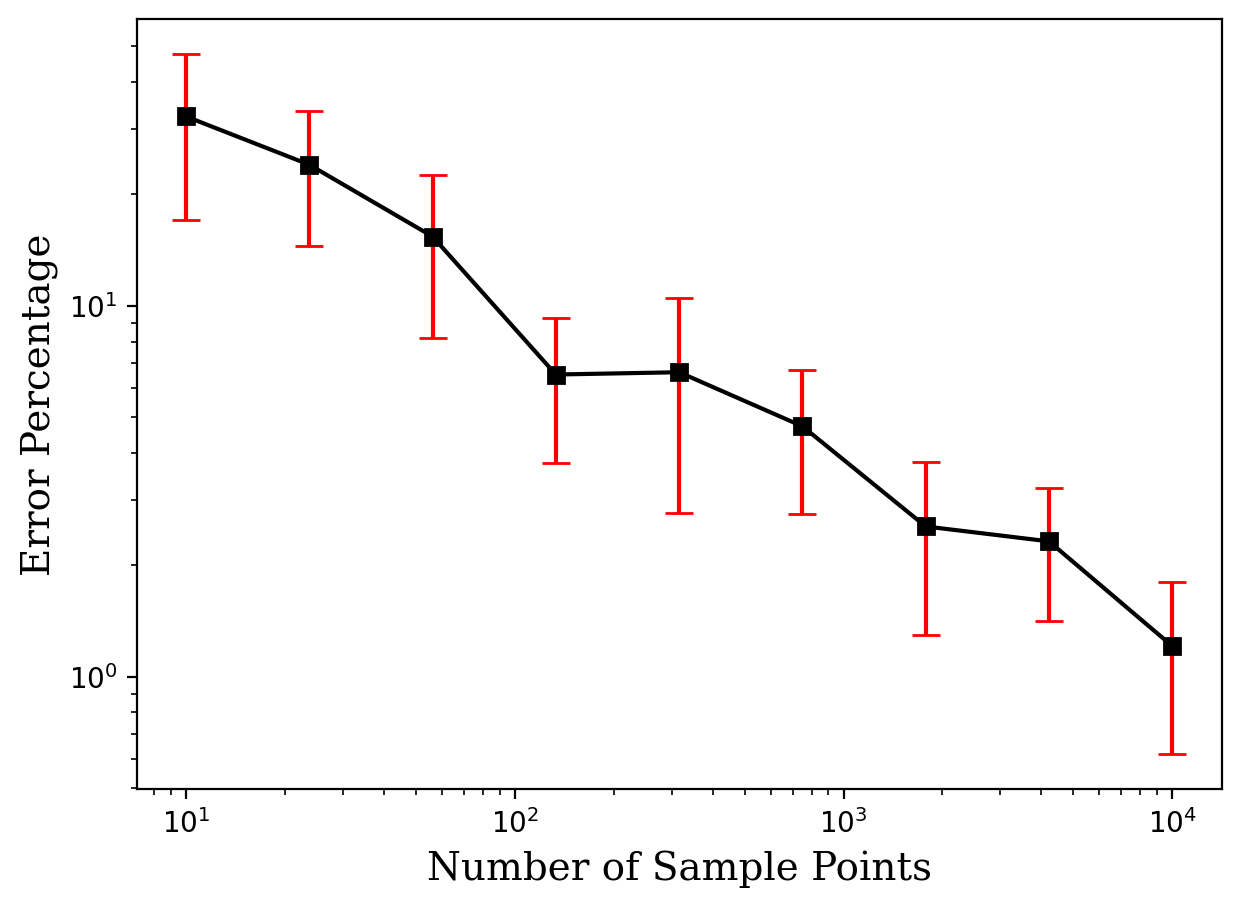

([32.353943433453935,
  23.979705796522826,
  15.353934785933582,
  6.518947904537161,
  6.612504299431812,
  4.727451754018605,
  2.5385220445834986,
  2.314359848241588,
  1.2079283218637877],
 [15.300524506552131,
  9.530481613812936,
  7.200463151482008,
  2.7516753705381025,
  3.8592943827651345,
  1.9864528413978504,
  1.2451303386195223,
  0.9033940953937646,
  0.58977498819216])

In [ ]:
N_SAMPLES = [300,600,900]
N_rep = 25
N_SAMPLES = np.logspace(1,4,num = 9)

Error_Plot (N_sim,N_SAMPLES,N_rep,nb,nw)